In [1]:
from tensorflow.keras.layers import Input,Lambda,Dense,Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob


In [2]:
IMAGE_SIZE=[224,224]
train_path = '/content/drive/MyDrive/train'
val_path = '/content/drive/MyDrive/val'

In [3]:
# resnet = ResNet50(input_shape=IMAGE_SIZE + [3] ,weights='imagenet',include_top=False)
inception = InceptionV3(input_shape=IMAGE_SIZE+[3],weights='imagenet',include_top=False)
 

87924736/87910968 [==============================] - 1s 0us/step


In [4]:
for layer in inception.layers:
  layer.trainable = False

In [5]:
x=Flatten()(inception.output)

In [6]:
folders = glob('/content/drive/MyDrive/train/*')

In [7]:
prediction = Dense(len(folders),activation='softmax')(x)

In [8]:
model = Model(inputs=inception.input,outputs=prediction)

In [9]:
# x=Flatten()(resnet.output)
model = Model(inputs=inception.input, outputs=prediction)

In [10]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 111, 111, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 111, 111, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                           

In [11]:
model.compile(
    loss = 'categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [12]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale= 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale = 1./255)

In [13]:
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/train/',
                                                 target_size=(224,224),
                                                 batch_size=32,
                                                 class_mode='categorical')

Found 1951 images belonging to 4 classes.


In [14]:
test_set = train_datagen.flow_from_directory('/content/drive/MyDrive/val',
                                                 target_size=(224,224),
                                                 batch_size=32,
                                                 class_mode='categorical')

Found 324 images belonging to 4 classes.


In [15]:

r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=50,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  import sys


Epoch 1/50
61/61 [==============================] - 1382s 22s/step - loss: 2.6219 - accuracy: 0.7166 - val_loss: 1.1739 - val_accuracy: 0.8241
Epoch 2/50
61/61 [==============================] - 46s 755ms/step - loss: 0.7205 - accuracy: 0.8801 - val_loss: 0.5445 - val_accuracy: 0.8920
Epoch 3/50
61/61 [==============================] - 45s 746ms/step - loss: 0.3741 - accuracy: 0.9185 - val_loss: 0.6227 - val_accuracy: 0.8858
Epoch 4/50
61/61 [==============================] - 46s 751ms/step - loss: 0.5401 - accuracy: 0.9113 - val_loss: 0.6001 - val_accuracy: 0.9136
Epoch 5/50
61/61 [==============================] - 46s 749ms/step - loss: 0.4571 - accuracy: 0.9216 - val_loss: 0.6523 - val_accuracy: 0.8920
Epoch 6/50
61/61 [==============================] - 45s 743ms/step - loss: 0.3997 - accuracy: 0.9385 - val_loss: 0.5702 - val_accuracy: 0.9321
Epoch 7/50
61/61 [==============================] - 45s 745ms/step - loss: 0.4350 - accuracy: 0.9364 - val_loss: 0.8903 - val_accuracy: 0.8889

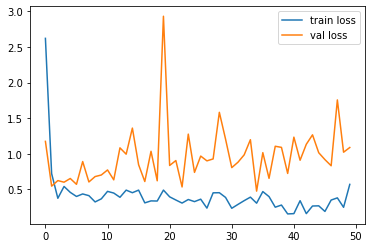

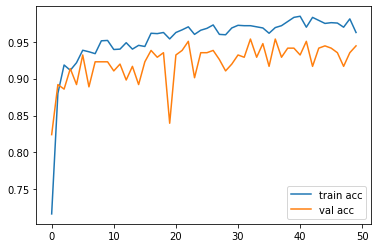

<Figure size 432x288 with 0 Axes>

In [16]:
import matplotlib.pyplot as plt

plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [19]:
from tensorflow.keras.models import load_model

model.save('model_inception.h5')

In [40]:
model=load_model('model_inception.h5')

In [54]:
img=image.load_img('/content/drive/MyDrive/test/diseased cotton leaf/dis_leaf (322).jpg',target_size=(224,224))

In [55]:
x=image.img_to_array(img)
x

array([[[137., 118., 103.],
        [142., 122., 111.],
        [124., 105.,  90.],
        ...,
        [ 82., 122.,  26.],
        [ 92., 131.,  38.],
        [139., 175.,  67.]],

       [[164., 139., 117.],
        [149., 127., 104.],
        [134., 117.,  97.],
        ...,
        [126., 165.,  46.],
        [ 86., 123.,  28.],
        [ 97., 135.,  36.]],

       [[164., 142., 118.],
        [141., 120., 101.],
        [129., 112.,  92.],
        ...,
        [130., 159.,  33.],
        [ 95., 133.,  30.],
        [ 97., 137.,  38.]],

       ...,

       [[127., 156.,  90.],
        [125., 154.,  88.],
        [132., 159.,  90.],
        ...,
        [106., 135.,  55.],
        [111., 139.,  62.],
        [108., 136.,  59.]],

       [[123., 154.,  87.],
        [127., 156.,  90.],
        [125., 156.,  89.],
        ...,
        [104., 135.,  59.],
        [106., 137.,  61.],
        [115., 143.,  68.]],

       [[127., 156.,  90.],
        [132., 161.,  95.],
        [131., 1

In [56]:
x=x/255


In [57]:
x

array([[[0.5372549 , 0.4627451 , 0.40392157],
        [0.5568628 , 0.47843137, 0.43529412],
        [0.4862745 , 0.4117647 , 0.3529412 ],
        ...,
        [0.32156864, 0.47843137, 0.10196079],
        [0.36078432, 0.5137255 , 0.14901961],
        [0.54509807, 0.6862745 , 0.2627451 ]],

       [[0.6431373 , 0.54509807, 0.45882353],
        [0.58431375, 0.49803922, 0.40784314],
        [0.5254902 , 0.45882353, 0.38039216],
        ...,
        [0.49411765, 0.64705884, 0.18039216],
        [0.3372549 , 0.48235294, 0.10980392],
        [0.38039216, 0.5294118 , 0.14117648]],

       [[0.6431373 , 0.5568628 , 0.4627451 ],
        [0.5529412 , 0.47058824, 0.39607844],
        [0.5058824 , 0.4392157 , 0.36078432],
        ...,
        [0.50980395, 0.62352943, 0.12941177],
        [0.37254903, 0.52156866, 0.11764706],
        [0.38039216, 0.5372549 , 0.14901961]],

       ...,

       [[0.49803922, 0.6117647 , 0.3529412 ],
        [0.49019608, 0.6039216 , 0.34509805],
        [0.5176471 , 0

In [58]:
import numpy as np
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [59]:
model.predict(img_data)


array([[0., 1., 0., 0.]], dtype=float32)

In [3]:
a=np.argmax(model.predict(img_data), axis=1)

NameError: ignored

In [2]:
  if a==0:
        print("The leaf is diseased cotton leaf")
  elif a==1:
        print("The leaf is diseased cotton leaf")
  elif a==2:
        print("The leaf is diseased cotton leaf")
  else:
        print("The leaf is diseased cotton leaf")
        

NameError: ignored